In [1725]:
import pandas as pd
import re
from sklearn.metrics import accuracy_score

df_train= pd.read_excel("mypertaminadata.xlsx")
df_train.head()

,text,Sentimen
0,"Caessar Titto,1,2022-07-15 23:29:56,""Semoga ap...",1
1,"dimas aulia rahman,1,2022-07-15 23:31:43,Aplik...",1
2,"Batterfly 12,1,2022-07-15 23:41:43,Ntah laah s...",0
3,"Keyaan Channel,1,2022-0 7-15 23:45:23,Selevel ...",0
4,"karya saputra,1,2022-07-16 00:00:53,""Maaf kasi...",0


In [1726]:
df_train['text'] = df_train['text'].apply(lambda x: re.sub('(<.*?>)', ' ', x))

df_train['text'] = df_train['text'].apply(lambda x: re.sub('[,\.!?:()"]', '', x))
    
df_train['text'] = df_train['text'].apply(lambda x: x.strip())

df_train['text'] = df_train['text'].apply(lambda x: re.sub('[^a-zA-Z"]',' ',x))
    
df_train['text'] = df_train['text'].apply(lambda x: x.lower())

In [1727]:
import nltk

nltk.download('punkt')

from nltk.tokenize import word_tokenize
# text = "Dear Gojek yang saya yakin para programmernya memiliki ilmu yang sangat tinggi mengenai manajemen sistem, mohon perbaiki ALAMAT FAVORIT, coba kembalikan fungsinya seperti semula, yaitu mempermudah memilih tujuan. Aplikasinya sudah saya update beberapa kali, tapi tetap saja tidak diperbaiki, yang harusnya tinggal klik alamat untuk memilih tujuan dan titik jemput, sekarang malah cuma menampilkan informasi alamat, dan paling menjengkelkan lagi, kita harus memilih alamat lewat peta. Tolong PERBAIKI"
# print(word_tokenize(text))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [1728]:
from nltk.tokenize import sent_tokenize

data = []
for i in range (len(df_train['text'])):
    text = word_tokenize(df_train['text'][i])
    data.append(text)
    # text

data[0]

['caessar',
 'titto',
 'semoga',
 'aplikasinya',
 'cepat',
 'diperbaiki',
 'karena',
 'begitu',
 'banyak',
 'masalah',
 'saat',
 'menggunakan',
 'aplikasi',
 'ini',
 'aplikasi',
 'ini',
 'setidaknya',
 'jangan',
 'membuat',
 'kami',
 'tambah',
 'susahkarena',
 'kami',
 'udah',
 'sangat',
 'susah']

In [1729]:
text_file = open("stopwords-id.txt", "r")
lines = text_file.readlines()
stopwords = []
for sub in lines:
    stopwords.append(sub.replace("\n", ""))

In [1730]:
quote_without_stopwords_arr = []

for i in range(len(df_train['text'])):
    quote_without_stopwords = []
    for word in data[i]:
        if word.casefold() not in stopwords:
            quote_without_stopwords.append(word)
    quote_without_stopwords_arr.append(quote_without_stopwords)

quote_without_stopwords_arr[0]

['caessar',
 'titto',
 'semoga',
 'aplikasinya',
 'cepat',
 'diperbaiki',
 'aplikasi',
 'aplikasi',
 'susahkarena',
 'udah',
 'susah']

In [1731]:
df_train['processed_text'] = ' '
df_train['text_list'] = ''
for i in range(len(df_train['text'])):
    df_train['processed_text'][i] = ' '.join(quote_without_stopwords_arr[i])
    df_train['text_list'][i] = quote_without_stopwords_arr[i]

<ipython-input-1731-4574f47c88f8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['processed_text'][i] = ' '.join(quote_without_stopwords_arr[i])
<ipython-input-1731-4574f47c88f8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['text_list'][i] = quote_without_stopwords_arr[i]


In [1732]:
df_train.head()

,text,Sentimen,processed_text,text_list
0,caessar titto semoga aplikasi...,1,caessar titto semoga aplikasinya cepat diperba...,"[caessar, titto, semoga, aplikasinya, cepat, d..."
1,dimas aulia rahman aplikasi a...,1,dimas aulia rahman aplikasi nik terbaca,"[dimas, aulia, rahman, aplikasi, nik, terbaca]"
2,batterfly ntah laah susah ...,0,batterfly ntah laah susah jelaskanribeet,"[batterfly, ntah, laah, susah, jelaskanribeet]"
3,keyaan channel selevel negar...,0,keyaan channel selevel negara g bikin aplikasi...,"[keyaan, channel, selevel, negara, g, bikin, a..."
4,karya saputra maaf kasih bn...,0,karya saputra maaf kasih bntng karna ga epekti...,"[karya, saputra, maaf, kasih, bntng, karna, ga..."


In [1733]:
def calc_TF(document):
    # Counts the number of times the word appears in review
    TF_dict = {}
    for term in document:
        if term in TF_dict:
            TF_dict[term] += 1
        else:
            TF_dict[term] = 1
    # Computes tf for each word
    for term in TF_dict:
        TF_dict[term] = TF_dict[term] / len(document)
    return TF_dict

df_train["TF_dict"] = df_train['text_list'].apply(calc_TF)

In [1734]:
def calc_DF(tfDict):
    count_DF = {}
    for document in tfDict:
        for term in document:
            if term in count_DF:
                count_DF[term] += 1
            else:
                count_DF[term] = 1
    return count_DF

DF = calc_DF(quote_without_stopwords_arr)

In [1735]:
import numpy as np

n_document = len(df_train)

def calc_IDF(__n_document, __DF):
    IDF_Dict = {}
    for term in __DF:
        IDF_Dict[term] = np.log(__n_document / (__DF[term] + 1))
    return IDF_Dict
  
#Stores the idf dictionary
IDF = calc_IDF(n_document, DF)

In [1736]:
def calc_TF_IDF(TF):
    TF_IDF_Dict = {}
    for key in TF:
        TF_IDF_Dict[key] = TF[key] * IDF[key]
    return TF_IDF_Dict

df_train["TF-IDF_dict"] = df_train["TF_dict"].apply(calc_TF_IDF)

In [1737]:
df_train.head()

,text,Sentimen,processed_text,text_list,TF_dict,TF-IDF_dict
0,caessar titto semoga aplikasi...,1,caessar titto semoga aplikasinya cepat diperba...,"[caessar, titto, semoga, aplikasinya, cepat, d...","{'caessar': 0.09090909090909091, 'titto': 0.09...","{'caessar': 0.40207714810855794, 'titto': 0.40..."
1,dimas aulia rahman aplikasi a...,1,dimas aulia rahman aplikasi nik terbaca,"[dimas, aulia, rahman, aplikasi, nik, terbaca]","{'dimas': 0.16666666666666666, 'aulia': 0.1666...","{'dimas': 0.6520038342380243, 'aulia': 0.80471..."
2,batterfly ntah laah susah ...,0,batterfly ntah laah susah jelaskanribeet,"[batterfly, ntah, laah, susah, jelaskanribeet]","{'batterfly': 0.2, 'ntah': 0.2, 'laah': 0.2, '...","{'batterfly': 0.9656627474604603, 'ntah': 0.96..."
3,keyaan channel selevel negar...,0,keyaan channel selevel negara g bikin aplikasi...,"[keyaan, channel, selevel, negara, g, bikin, a...","{'keyaan': 0.034482758620689655, 'channel': 0....","{'keyaan': 0.16649357714835522, 'channel': 0.1..."
4,karya saputra maaf kasih bn...,0,karya saputra maaf kasih bntng karna ga epekti...,"[karya, saputra, maaf, kasih, bntng, karna, ga...","{'karya': 0.08333333333333333, 'saputra': 0.08...","{'karya': 0.4023594781085251, 'saputra': 0.344..."


In [1738]:
sorted_DF = sorted(DF.items(), key=lambda kv: kv[1], reverse=True)[:50]

unique_term = [item[0] for item in sorted_DF]

def calc_TF_IDF_Vec(__TF_IDF_Dict):
    TF_IDF_vector = [0.0] * len(unique_term)

    for i, term in enumerate(unique_term):
        if term in __TF_IDF_Dict:
            TF_IDF_vector[i] = __TF_IDF_Dict[term]
    return TF_IDF_vector

df_train["TF_IDF_Vec"] = df_train["TF-IDF_dict"].apply(calc_TF_IDF_Vec)

print("print first row matrix TF_IDF_Vec Series\n")
print(df_train["TF_IDF_Vec"][0])

print("\nmatrix size : ", len(df_train["TF_IDF_Vec"][0]))

print first row matrix TF_IDF_Vec Series

[0.13497044086376675, 0.0, 0.0, 0.0, 0.0, 0.17873753239753026, 0.0, 0.0, 0.0, 0.19902330978973115, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2443861430732755, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2839605131876251, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

matrix size :  50


In [1739]:
df_train.head()

,text,Sentimen,processed_text,text_list,TF_dict,TF-IDF_dict,TF_IDF_Vec
0,caessar titto semoga aplikasi...,1,caessar titto semoga aplikasinya cepat diperba...,"[caessar, titto, semoga, aplikasinya, cepat, d...","{'caessar': 0.09090909090909091, 'titto': 0.09...","{'caessar': 0.40207714810855794, 'titto': 0.40...","[0.13497044086376675, 0.0, 0.0, 0.0, 0.0, 0.17..."
1,dimas aulia rahman aplikasi a...,1,dimas aulia rahman aplikasi nik terbaca,"[dimas, aulia, rahman, aplikasi, nik, terbaca]","{'dimas': 0.16666666666666666, 'aulia': 0.1666...","{'dimas': 0.6520038342380243, 'aulia': 0.80471...","[0.1237229041251195, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,batterfly ntah laah susah ...,0,batterfly ntah laah susah jelaskanribeet,"[batterfly, ntah, laah, susah, jelaskanribeet]","{'batterfly': 0.2, 'ntah': 0.2, 'laah': 0.2, '...","{'batterfly': 0.9656627474604603, 'ntah': 0.96...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.39322257127456656,..."
3,keyaan channel selevel negar...,0,keyaan channel selevel negara g bikin aplikasi...,"[keyaan, channel, selevel, negara, g, bikin, a...","{'keyaan': 0.034482758620689655, 'channel': 0....","{'keyaan': 0.16649357714835522, 'channel': 0.1...","[0.025597842232783347, 0.04979046461919059, 0...."
4,karya saputra maaf kasih bn...,0,karya saputra maaf kasih bntng karna ga epekti...,"[karya, saputra, maaf, kasih, bntng, karna, ga...","{'karya': 0.08333333333333333, 'saputra': 0.08...","{'karya': 0.4023594781085251, 'saputra': 0.344...","[0.0, 0.0, 0.0, 0.14106829344776262, 0.0, 0.16..."


In [1740]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [1741]:
enc = LabelEncoder()
df_train['Sentimen'] = enc.fit_transform(df_train['Sentimen'].values)
cls = df_train['Sentimen']
cls

0      1
1      1
2      0
3      0
4      0
      ..
245    1
246    1
247    0
248    1
249    0
Name: Sentimen, Length: 250, dtype: int64

In [1742]:
attrs = df_train['TF_IDF_Vec']
attrs

0      [0.13497044086376675, 0.0, 0.0, 0.0, 0.0, 0.17...
1      [0.1237229041251195, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2      [0.0, 0.0, 0.0, 0.0, 0.0, 0.39322257127456656,...
3      [0.025597842232783347, 0.04979046461919059, 0....
4      [0.0, 0.0, 0.0, 0.14106829344776262, 0.0, 0.16...
                             ...                        
245    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.195...
246    [0.37116871237535853, 0.0, 0.0, 0.0, 0.0, 0.0,...
247    [0.09279217809383963, 0.0, 0.20891416451902348...
248    [0.0, 0.20627478199378957, 0.0, 0.0, 0.0, 0.0,...
249    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: TF_IDF_Vec, Length: 250, dtype: object

In [1743]:
column_name = []
dataset = []

for i in range(len(attrs[0])):
    column_name.append("X"+str(i))

for i in range(len(attrs)):
    dataset.append(attrs[i])

attr = pd.DataFrame(dataset, columns=column_name)

In [1744]:
attr

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49
0,0.134970,0.000000,0.000000,0.000000,0.0,0.178738,0.0,0.0,0.000000,0.199023,...,0.283961,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.123723,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.0,0.393223,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.025598,0.049790,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.075492,...,0.000000,0.430837,0.107709,0.107709,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.141068,0.0,0.163843,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.195833,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
246,0.371169,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
247,0.092792,0.000000,0.208914,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
248,0.000000,0.206275,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [1745]:
x_train, x_test, y_train, y_test = train_test_split(attr, cls, test_size = 0.2)
tree = SVC()
tree.fit(x_train, y_train)

SVC()

In [1746]:
model = SVC(
    C = 20,
    cache_size = 25,
    decision_function_shape = 'ovr',
    gamma = 1.0,
    kernel = 'linear',
    max_iter = 100,
    random_state = 0,
    tol = 0.01,
    verbose = False
    )

model = model.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [1747]:
import joblib

# save the model to disk
filename = 'finalized_model.sav'
joblib.dump(model, filename)

['finalized_model.sav']

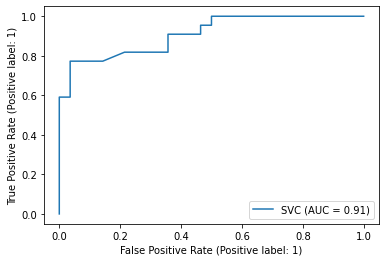

In [1748]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(model, x_test, y_test)

Text(0.5, 1.0, '2-class Precision-Recall curve')

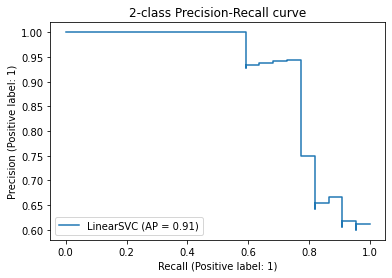

In [1749]:
from sklearn.metrics import PrecisionRecallDisplay

y_score = model.decision_function(x_test)

display = PrecisionRecallDisplay.from_predictions(y_test, y_score, name="LinearSVC")
display.ax_.set_title("2-class Precision-Recall curve")

In [1750]:
prediction = model.predict(x_test)
false = (prediction != y_test).sum()
true = (prediction == y_test).sum()
print("accuration: ", true / (true + false) * 100, '%')

accuration:  86.0 %


0.86


Text(0.5, 1.0, '2-class Precision-Recall curve')

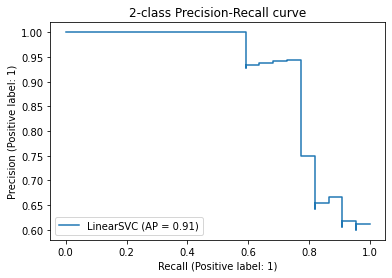

In [1754]:
loaded_model = joblib.load('finalized_model2.sav')
result = loaded_model.score(x_test, y_test)
print(result)

y_score = loaded_model.decision_function(x_test)

display = PrecisionRecallDisplay.from_predictions(y_test, y_score, name="LinearSVC")
display.ax_.set_title("2-class Precision-Recall curve")